In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
X,Y = make_regression(n_samples=1000,n_features=20,n_informative=20,noise=0.2,random_state=1)
print(X.shape,Y.shape)

(1000, 20) (1000,)


In [4]:
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X-u)/std

In [5]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape,Y.shape)

(1000, 21) (1000,)


In [15]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    e = (np.sum((y-y_)**2))
    return e/m

def gradient(X,y,theta):
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_-y))
    return grad/X.shape[0]

def gradient_descent(X,y,lr=0.02,epochs=500):
    n = X.shape[1]
    theta = np.zeros((n,))
    errList = []
    for i in range(epochs):
        e = error(X,y,theta)
        errList.append(e)
        theta = theta- lr*gradient(X,y,theta)
    return theta,errList

In [16]:
theta,errorList = gradient_descent(X,Y)

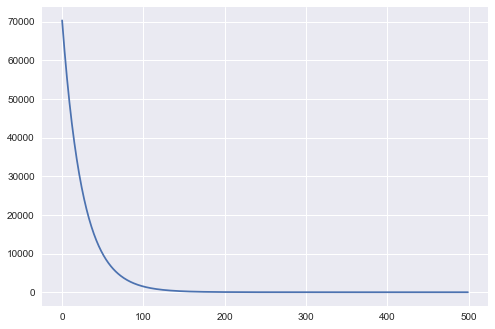

In [17]:
plt.style.use('seaborn')
plt.figure()
plt.plot(np.arange(len(errorList)),errorList)
plt.show()